In [1]:
import pandas as pd
import numpy as np

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
import random
np.random.seed(1234)
random.seed(1234)

# 1. EDA

### 데이터의 행과 열 확인하기

In [5]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


### 데이터 내용 미리보기

In [6]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 데이터 속성 확인하기

In [9]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 양적 데이터 통계량 확인하기

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 카테고리 변수 확인하기

In [12]:
train_df.dtypes[train_df.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [13]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
train_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### 결측치 확인하기

In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 시각화 및 표시 스타일 지정

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.style.use('ggplot')

### 목적 변수 관련 데이터의 시각화

In [21]:
train_df[['Embarked', 'Survived', 'PassengerId']]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [22]:
train_df[['Embarked', 'Survived', 'PassengerId']].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [23]:
train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked','Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

### 데이터를 수평으로 변환하기

In [24]:
embarked_df = train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked','Survived']).count().unstack()

In [25]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

### 누적 막대 그래프로 시각화하기

<Axes: xlabel='Embarked'>

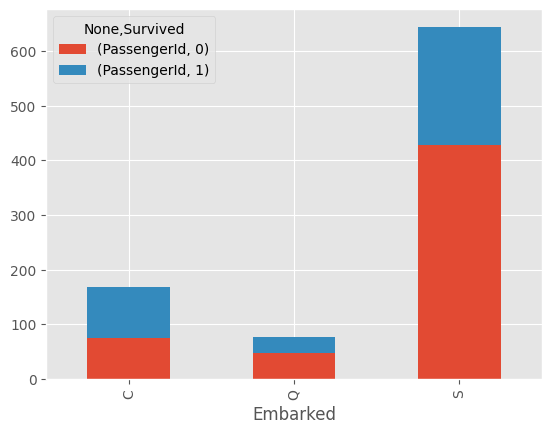

In [26]:
embarked_df.plot.bar(stacked=True)

### 수치로 확인하기

In [27]:
embarked_df['survival_rate'] = embarked_df.iloc[:,1] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [28]:
embarked_df

PassengerId      survival_rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

### 성별과 티켓등급 시각화하기

<Axes: xlabel='Sex'>

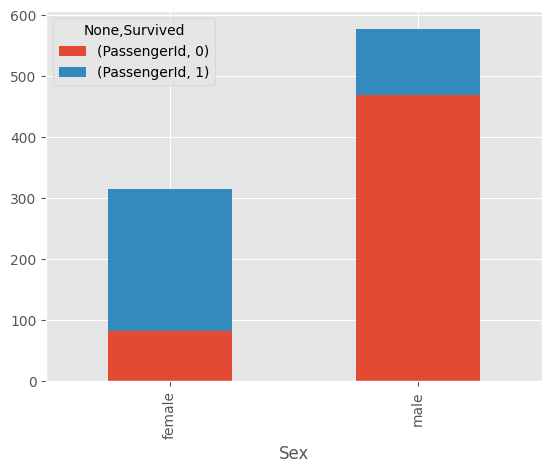

In [29]:
sex_df = train_df[['Sex', 'Survived', 'PassengerId']].dropna().groupby(['Sex','Survived']).count().unstack()
sex_df.plot.bar(stacked=True)

In [30]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<Axes: xlabel='Pclass'>

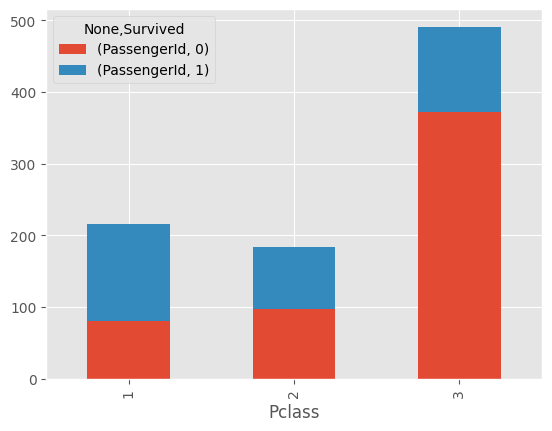

In [31]:
ticket_df = train_df[['Pclass', 'Survived', 'PassengerId']].dropna().groupby(['Pclass','Survived']).count().unstack()
ticket_df.plot.bar(stacked=True)

### 연령별 생존율을 히스토그램으로 시각화하기
연령은 연속형 값이므로 히스토그램으로 확인

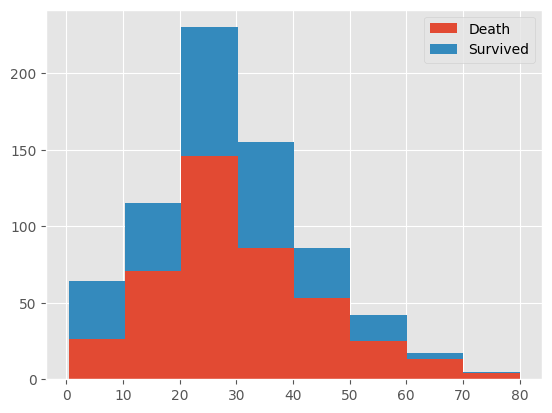

In [32]:
plt.hist(x = [train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]], 
        bins = 8, histtype = 'barstacked', label = ['Death', 'Survived'])
plt.legend()

### 카테고리 변수를 더미 변수화하기
원-핫 인코딩: 카테고리 변수에 대하여 그 값을 0과 1로 나타내는 방법(더미 변수화)

In [33]:
train_df_corr = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=['Embarked'])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


### 상관 행렬 작성하기

In [34]:
train_corr = train_df_corr[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S']].corr()

In [35]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


### 히트맵으로 상관행렬 시각화하기

<Axes: >

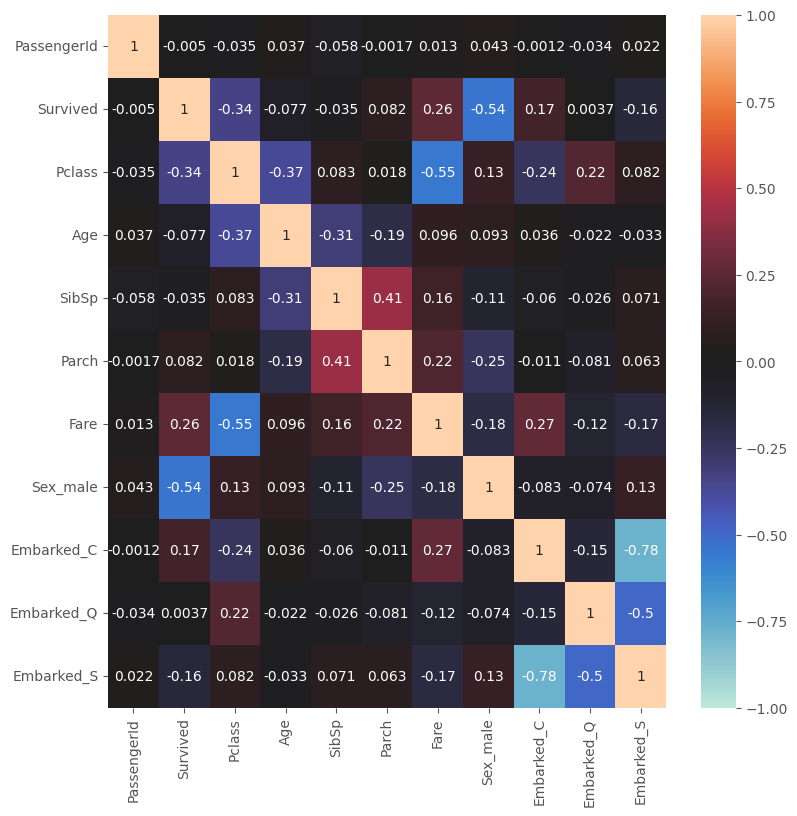

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

Age의 경우 상관계수가 낮아 보이지만 10세 이하 연령대의 생존율 경향성과 다른 연령대의 경향성이 반대라면 상관계수가 낮게 나올 수 있음. 즉 상관계수는 참고만 하는 것이 좋음.

### 전처리할 데이터
- Fare
- Name
- Parch, SibSp

### 학습 데이터와 테스트 데이터의 통합

In [37]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True) # 합친 후 행 번호 다시 매기고 원래 행 번호 삭제

In [38]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 전체 데이터로 결측치 수 확인하기

In [39]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 결측치 메우기(Fare)

In [40]:
Fare_mean = all_df[["Pclass","Fare"]].groupby('Pclass').mean().reset_index()
Fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [41]:
Fare_mean.columns = ['Pclass', 'Fare_mean']

In [42]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [43]:
all_df[all_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [44]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Name 호칭에 주목하기
- Master: 남자 아이
- Mr: 성인 남성
- Miss: 미혼 여성(Mrs보다 연령 낮을 가능성)
- Mrs: 기혼 여성(Miss보다 연령 낮을 가능성)

In [45]:
all_df['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

### 호칭을 변수로 추가하기

In [46]:
name_df = all_df['Name'].str.split("[,.]", n=2, expand=True) # 최대 0~2번까지 쪼개고 각각을 다른 칼럼으로

In [47]:
name_df.columns = ['family_name', 'honorific', 'name'] # 성씨, 호칭, 이름

In [48]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [49]:
name_df['family_name'] = name_df['family_name'].str.strip()
name_df['honorific'] = name_df['honorific'].str.strip()
name_df['name'] = name_df['name'].str.strip()

In [50]:
name_df['honorific'].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [51]:
name_sex_df = pd.concat([name_df, all_df['Sex']], axis=1)
name_sex_df

,family_name,honorific,name,Sex
0,Braund,Mr,Owen Harris,male
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),female
2,Heikkinen,Miss,Laina,female
3,Futrelle,Mrs,Jacques Heath (Lily May Peel),female
4,Allen,Mr,William Henry,male
...,...,...,...,...
1304,Spector,Mr,Woolf,male
1305,Oliva y Ocana,Dona,Fermina,female
1306,Saether,Mr,Simon Sivertsen,male
1307,Ware,Mr,Frederick,male


In [52]:
pd.crosstab(name_sex_df.honorific, name_sex_df.Sex).T.style.background_gradient(cmap='summer_r')

honorific,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [53]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 

### 호칭별 연령 분포 확인하기

In [54]:
all_df = pd.concat([all_df, name_df], axis=1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [55]:
all_df['honorific'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

/tmp/ipykernel_18/958077698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df['honorific'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)


In [56]:
pd.crosstab(all_df.honorific, all_df.Sex).T.style.background_gradient(cmap='summer_r')

honorific,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,265,1,200,0
male,61,0,769,0,13


<Axes: xlabel='honorific', ylabel='Age'>

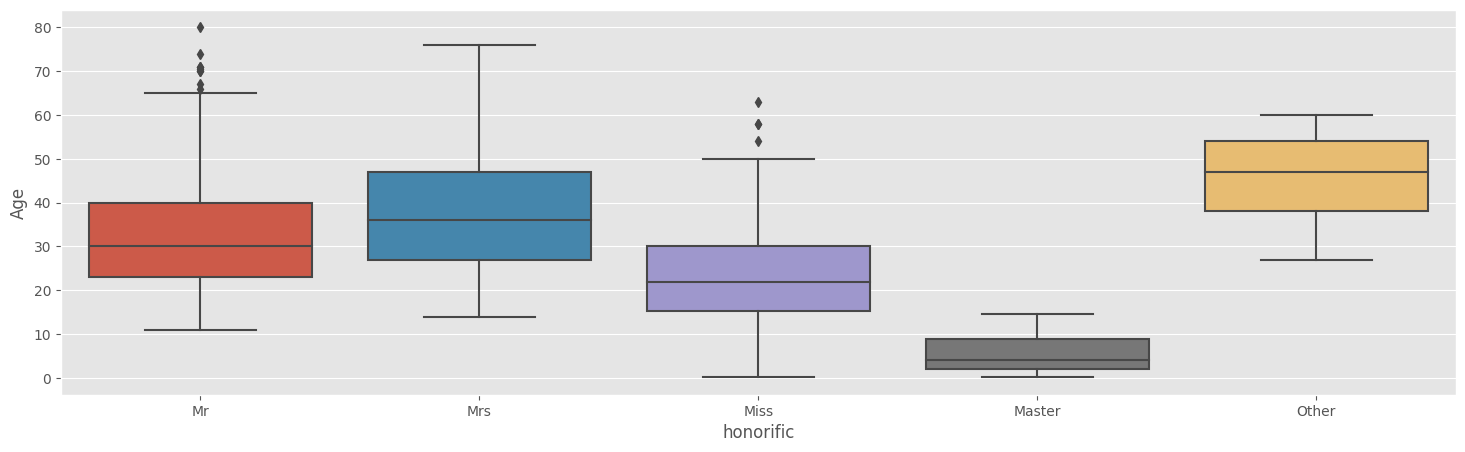

In [57]:
plt.figure(figsize=(18,5))
sns.boxplot(x='honorific', y='Age', data=all_df)

### 호칭별 연령 평균값 확인하기

In [58]:
all_df[['Age', 'honorific']].groupby('honorific').mean()

,Age
honorific,
Master,5.482642
Miss,21.834533
Mr,32.545531
Mrs,37.046243
Other,44.923077


In [59]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [60]:
all_df[['family_name','honorific','name']]

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Mrs,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


### 호칭별 생존율 차이 확인하기

In [61]:
train_df = pd.concat([train_df, all_df[['family_name','honorific','name']][0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, all_df[['family_name','honorific','name']][len(train_df):].reset_index(drop=True)], axis=1)

In [62]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Other,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr,Karl Howell


<Axes: xlabel='honorific'>

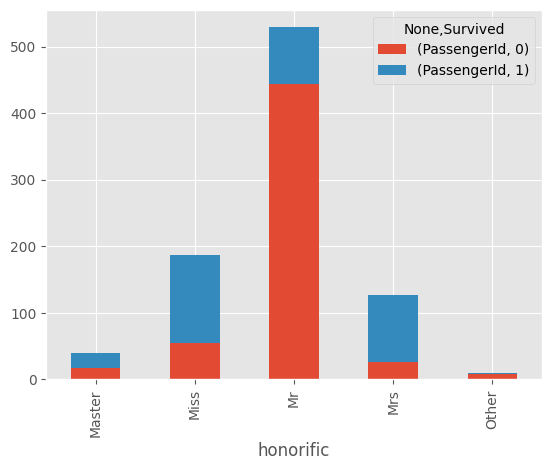

In [63]:
honorific_df = train_df[['honorific','Survived','PassengerId']].dropna().groupby(['honorific','Survived']).count().unstack()
honorific_df.plot.bar(stacked=True)

### 연령 결측치를 호칭별 평균 연령으로 보완하기

In [64]:
honorific_age_mean = all_df[['honorific','Age']].groupby('honorific').mean().reset_index()
honorific_age_mean.columns = ['honorific','honorific_Age']

In [65]:
all_df = pd.merge(all_df, honorific_age_mean, on='honorific', how='left')
all_df.loc[(all_df['Age'].isnull()), 'Age'] = all_df['honorific_Age'] # 결측값을 평균값으로 대체
all_df = all_df.drop(['honorific_Age'], axis=1)

In [66]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.545531,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Mrs,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.545531,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


### 가족 인원수 추가하기

In [67]:
all_df['family_num'] = all_df['Parch'] + all_df['SibSp']
all_df['family_num'].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

### 홀로 승선했는지 여부를 새로운 변수로 추가하기

In [68]:
all_df.loc[all_df['family_num']==0, 'alone'] = 1
all_df.fillna(0, inplace=True)

In [69]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,Allen,Mr,William Henry,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,"Spector, Mr. Woolf",male,32.545531,0,0,A.5. 3236,8.0500,0,S,Spector,Mr,Woolf,0,1.0
1305,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Mrs,Fermina,0,1.0
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0,S,Saether,Mr,Simon Sivertsen,0,1.0
1307,1308,0.0,3,"Ware, Mr. Frederick",male,32.545531,0,0,359309,8.0500,0,S,Ware,Mr,Frederick,0,1.0


### 요금 가격대로 나누기

In [70]:
all_df['Fare_Range'] = pd.qcut(all_df['Fare'], 4)
all_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

/tmp/ipykernel_18/1295442804.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
"(-0.001, 7.896]",0.130178
"(7.896, 14.454]",0.212500
"(14.454, 31.275]",0.307927
"(31.275, 512.329]",0.399381


In [71]:
all_df['Fare_Range']

0         (-0.001, 7.896]
1       (31.275, 512.329]
2         (7.896, 14.454]
3       (31.275, 512.329]
4         (7.896, 14.454]
              ...        
1304      (7.896, 14.454]
1305    (31.275, 512.329]
1306      (-0.001, 7.896]
1307      (7.896, 14.454]
1308     (14.454, 31.275]
Name: Fare_Range, Length: 1309, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [72]:
all_df['Fare_cat'] = 0
all_df.loc[all_df['Fare']<=7.91, 'Fare_cat'] = 0
all_df.loc[(all_df['Fare']>7.91)&(all_df['Fare']<=14.454),'Fare_cat'] = 1
all_df.loc[(all_df['Fare']>14.454)&(all_df['Fare']<=31.0),'Fare_cat'] = 2
all_df.loc[(all_df['Fare']>31.0)&(all_df['Fare']<=512.329),'Fare_cat'] = 3

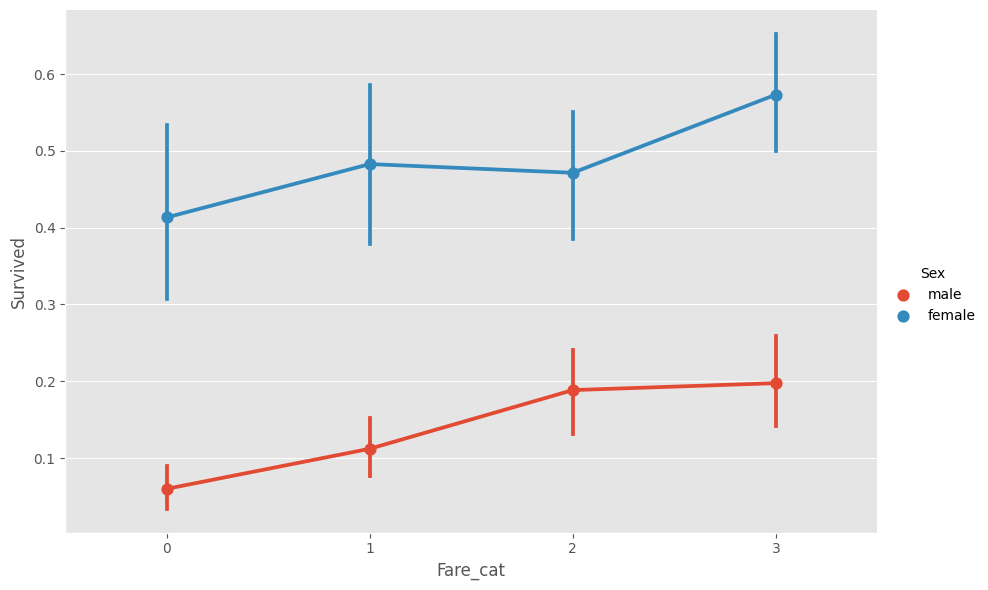

In [73]:
sns.catplot(x='Fare_cat', y='Survived', hue='Sex', kind='point', height=6, data=all_df, aspect=1.5)

### 불필요한 변수 삭제하기

In [74]:
all_df = all_df.drop(['PassengerId','Name','family_name','name','Ticket','Cabin','Fare','Fare_Range'], axis=1)

In [75]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,honorific,family_num,alone,Fare_cat
0,0.0,3,male,22.0,1,0,S,Mr,1,0.0,0
1,1.0,1,female,38.0,1,0,C,Mrs,1,0.0,3
2,1.0,3,female,26.0,0,0,S,Miss,0,1.0,1
3,1.0,1,female,35.0,1,0,S,Mrs,1,0.0,3
4,0.0,3,male,35.0,0,0,S,Mr,0,1.0,1


### 카테고리 변수를 수치로 변환하기

In [76]:
categories = all_df.columns[all_df.dtypes == 'object']
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [77]:
all_df.honorific.value_counts()

honorific
Mr        770
Miss      265
Mrs       200
Master     61
Other      13
Name: count, dtype: int64

### 문자열을 수치로 변환하기: 라벨 인코딩
라벨 인코딩: 각 카테고리를 임의의 숫자로 대체함. 숫자의 대소는 의미 없음.

In [78]:
all_df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
0      2
Name: count, dtype: int64

In [79]:
all_df.loc[all_df['Embarked']==0, 'Embarked'] = 'S'

In [80]:
all_df['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder

all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,honorific,family_num,alone,Fare_cat
0,0.0,3,male,22.0,1,0,S,Mr,1,0.0,0
1,1.0,1,female,38.0,1,0,C,Mrs,1,0.0,3
2,1.0,3,female,26.0,0,0,S,Miss,0,1.0,1
3,1.0,1,female,35.0,1,0,S,Mrs,1,0.0,3
4,0.0,3,male,35.0,0,0,S,Mr,0,1.0,1


In [82]:
le = LabelEncoder()
le = le.fit(all_df['Sex'])
all_df['Sex'] = le.transform(all_df['Sex'])

In [83]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,honorific,family_num,alone,Fare_cat
0,0.0,3,1,22.0,1,0,S,Mr,1,0.0,0
1,1.0,1,0,38.0,1,0,C,Mrs,1,0.0,3
2,1.0,3,0,26.0,0,0,S,Miss,0,1.0,1
3,1.0,1,0,35.0,1,0,S,Mrs,1,0.0,3
4,0.0,3,1,35.0,0,0,S,Mr,0,1.0,1


In [84]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == 'object':
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [85]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,honorific,family_num,alone,Fare_cat
0,0.0,3,1,22.0,1,0,2,2,1,0.0,0
1,1.0,1,0,38.0,1,0,0,3,1,0.0,3
2,1.0,3,0,26.0,0,0,2,1,0,1.0,1
3,1.0,1,0,35.0,1,0,2,3,1,0.0,3
4,0.0,3,1,35.0,0,0,2,2,0,1.0,1


### 모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기

In [86]:
train_X = all_df[~all_df['Survived'].isnull()].drop('Survived', axis=1).reset_index(drop=True)
train_Y = train_df['Survived']
test_X = all_df[all_df['Survived'].isnull()].drop('Survived', axis=1).reset_index(drop=True)